# 逻辑斯蒂回归原理

**逻辑斯蒂回归（Logistic Regression, LR）**是一种分类算法，通过将线性回归的输出映射到0到1的概率值，从而进行分类。虽然逻辑斯蒂回归名字中带 有“回归”二字，但逻辑斯蒂回归本质上是一种分类方法，而不是回归方法。

## 逻辑斯蒂回归数学表达式

### Sigmoid函数

逻辑斯蒂回归的核心就是Sigmoid函数，可以将任意实数值映射到(0, 1)区间，非常适合用来表示概率。Sigmoid函数的数学表达式为：

$$sigma(z) = \frac{1}{1 + e^{-z}}$$

通过这个公式，可以将线性回归的预测结果$z = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n$转换为一个概率值，表示某个事件发生的概率

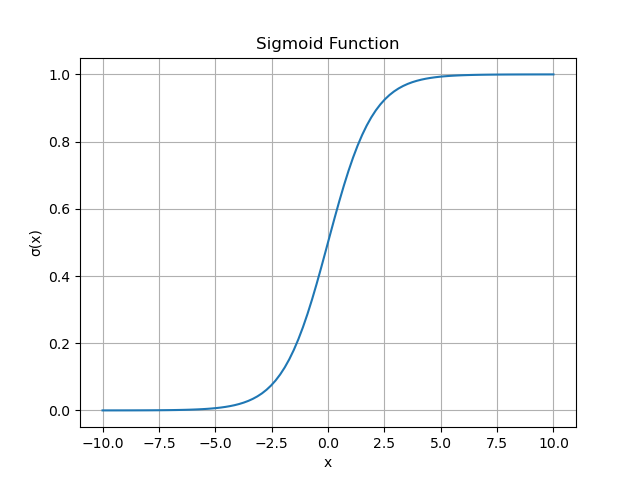

In [4]:
# Sigmoid函数图像展示
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C18 机器学习模型——逻辑斯蒂回归模型.png', width=600, height=400)

### 逻辑斯蒂回归模型

逻辑斯蒂回归通过一个线性模型来预测事件发生的概率。其核心思想是利用Sigmoid函数将线性回归的输出（可能是任意实数）转化为一个介于0和1之间的概率值。该概率值可以用来进行二分类决策。逻辑斯蒂回归模型的数学表达式为：
$$sigma(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}$$

其中，
- $\beta_0$是截距项；
- $\beta_1, \beta_2, \dots, \beta_n$是特征的系数；
- $x_1, x_2, \dots, x_n$是输入特征；
- $e$是自然对数的底

## 逻辑斯蒂回归目标函数（损失函数）

逻辑斯蒂回归的损失函数是交叉熵损失函数，目标函数是最小化这个交叉熵损失函数。其形式为： 
$$\min_{\beta} L(\beta) = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]$$ 
其中： 
- $\beta$是回归系数$\beta_1, \beta_2, \dots, \beta_n$；
- $y_i$是样本的真实标签（0或1）；
- $p_i$是模型对该样本预测的类别1的概率。
- $N$：样本数量。 

## 逻辑斯蒂回归的优缺点

### LR回归模型优点
- **可解释性强**：LR回归模型形式简单，模型输出范围自然地落在0和1之间，可解释性强，非常适合于概率预测和分类问题
- **训练简单高效**：模型的训练过程（参数估计）相对简单，通常使用梯度下降法，计算效率高
- **鲁棒性强**：模型结构简单，参数规模小，对于噪声数据不敏感，因此在噪声数据中的建模效果好，模型鲁棒性强

### LR回归模型缺点
- **非线性数据建模能力差**：LR回归假设特征与对数几率（log-odds）之间存在线性关系，对非线性特征不敏感，难以捕捉数据中的非线形特征，模型效果强依赖于人工特征工程
- **不平衡数据建模能力差**：在类别不平衡的数据集中，逻辑斯蒂回归可能会偏向于多数类，导致对少数类的预测性能较差
- **无法直接提供特征重要性**：逻辑斯蒂回归模型不像决策树那样容易提供特征的重要性评分，因此难以衡量各个特征的重要性与贡献程度

# 逻辑斯蒂回归案例

## LogisticRegression
  - `penalty`: 指定正则化类型
      - `l1`: 使用 L1 正则化（Lasso 正则化），这会导致部分系数为零，实现特征选择。
      - `l2`: 使用 L2 正则化（Ridge 正则化），会使系数平滑，但不会完全为零。
      - `elasticnet`: 结合 L1 和 L2 正则化（ElasticNet），通过 l1_ratio 参数控制两者的混合比例。
      - `none`: 不使用正则化。
  - `l1_ratio`: 仅在`penalty=elasticnet`时有效。控制 L1 和 L2 正则化的比例。l1_ratio=1 完全是 L1 正则化，l1_ratio=0 完全是 L2 正则化。
  - `C`: 正则化强度的倒数。较小的 C 值表示更强的正则化，可能会导致模型欠拟合；较大的 C 值会减弱正则化效果，可能会导致模型过拟合。
  - `class_weight`: 指定类别权重。可以用于处理不平衡数据集。
  - `n_jobs`: 指定使用核心数，默认值为None。n_jobs=-1 会利用所有核心，n_jobs=1 会使用一个核心。其他正整数指定使用的核心数。
  - `random_state`: 随机数种子。

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [5]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.linear_model import LogisticRegression  # 逻辑斯蒂回归分类器
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc  # 用于计算准确率，混淆矩阵等
import matplotlib.pyplot as plt  # 用于绘制图表
import seaborn as sns  # 用于绘制更美观的图表

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

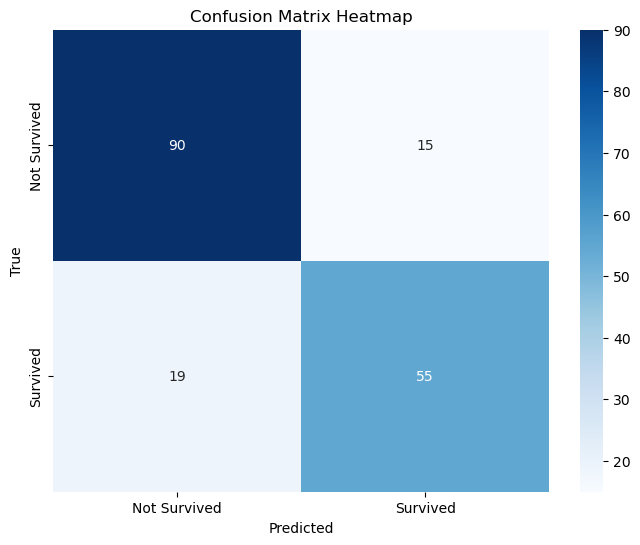

Classification Report:
              precision    recall  f1-score   support

           0     0.8257    0.8571    0.8411       105
           1     0.7857    0.7432    0.7639        74

    accuracy                         0.8101       179
   macro avg     0.8057    0.8002    0.8025       179
weighted avg     0.8092    0.8101    0.8092       179



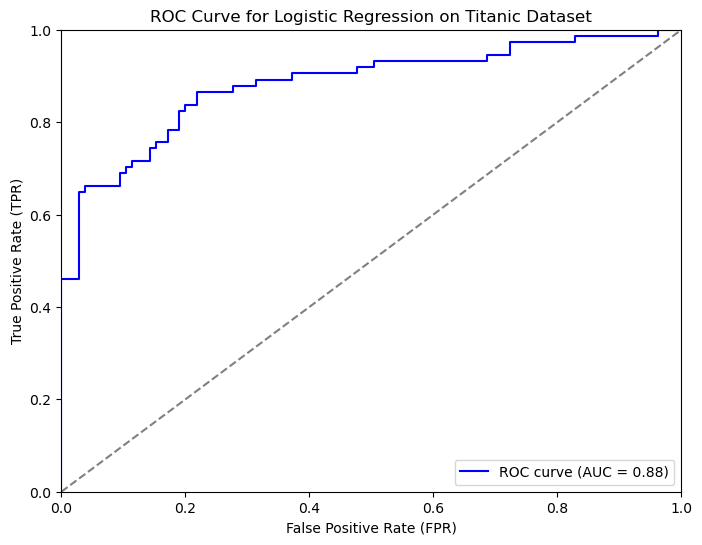

In [7]:
# 选择特征列（X）和目标列（y）
# 特征列： 'pclass'（舱位）, 'sex'（性别）, 'age'（年龄）, 'sibsp'（兄弟姐妹/配偶）, 
#         'parch'（父母/子女）, 'fare'（票价）, 'embarked'（登船港口）
# 目标列： 'survived'（是否生还，0=未生还，1=生还）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除缺失值
y = df['survived']  # 目标变量：生还状态

# 数据集划分：80% 用于训练，20% 用于验证
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建逻辑斯蒂回归分类器并训练
logreg_model = LogisticRegression(max_iter=200, random_state=42)  # max_iter=200 设定最大迭代次数
logreg_model.fit(X_train, y_train)  # 训练模型

# 使用测试集进行预测
y_probs = logreg_model.predict_proba(X_test)[:, 1]  # 获取正类别（生存）的概率
y_pred = logreg_model.predict(X_test)  # 获取分类预测结果（0 或 1）

# 计算混淆矩阵（Confusion Matrix）
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))  # 设置图像大小
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])  # 生成热力图
plt.title("Confusion Matrix Heatmap")  # 设置标题
plt.xlabel('Predicted')  # X 轴标签
plt.ylabel('True')  # Y 轴标签
plt.show()  # 显示图像

# 生成分类报告（包括精确率、召回率、F1 分数等）
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# 计算 ROC 曲线（假阳性率和真正率）与AUC得分
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # 计算 AUC（曲线下面积）

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))  # 设置图像大小
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')  # 绘制 ROC 曲线
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 绘制对角线（随机猜测的表现）
plt.xlim([0.0, 1.0])  # 设置 X 轴范围
plt.ylim([0.0, 1])  # 设置 Y 轴范围
plt.xlabel('False Positive Rate (FPR)')  # X 轴标签：假阳性率
plt.ylabel('True Positive Rate (TPR)')  # Y 轴标签：真正率
plt.title('ROC Curve for Logistic Regression on Titanic Dataset')  # 设置标题
plt.legend(loc='lower right')  # 添加图例
plt.show()  # 显示图像